<a href="https://colab.research.google.com/github/tofighi/MachineLearning/blob/master/road.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install pycaret -q

In [9]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [10]:
!wget https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/collission_clean.csv -q
import pandas as pd
dataset = pd.read_csv('collission_clean.csv')

In [11]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3143, 17)
Unseen Data For Predictions: (165, 17)


In [12]:
from pycaret.classification import *
exp_clf101 = setup(data = data, target = 'P_ISEV', session_id=123)

,Description,Value
0,session_id,123
1,Target,P_ISEV
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3143, 17)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.6445,0.6783,0.6676,0.6260,0.6455,0.2897,0.2912,0.060
ridge,Ridge Classifier,0.6423,0.0000,0.6667,0.6234,0.6437,0.2852,0.2867,0.021
et,Extra Trees Classifier,0.6391,0.6858,0.6116,0.6359,0.6215,0.2770,0.2785,0.664
lr,Logistic Regression,0.6386,0.6821,0.6489,0.6230,0.6350,0.2774,0.2784,0.728
rf,Random Forest Classifier,0.6359,0.6897,0.6134,0.6295,0.6202,0.2708,0.2717,0.675
gbc,Gradient Boosting Classifier,0.6341,0.6914,0.6321,0.6217,0.6263,0.2680,0.2685,0.344
ada,Ada Boost Classifier,0.6223,0.6726,0.6396,0.6061,0.6221,0.2451,0.2458,0.187
lightgbm,Light Gradient Boosting Machine,0.6132,0.6729,0.6060,0.6014,0.6033,0.2259,0.2261,0.132
dt,Decision Tree Classifier,0.5841,0.5829,0.5584,0.5758,0.5661,0.1671,0.1676,0.035
knn,K Neighbors Classifier,0.5577,0.5851,0.5640,0.5442,0.5537,0.1157,0.1159,0.141


In [13]:
print(best_model)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


In [14]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [15]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5818,0.5805,0.5093,0.5851,0.5446,0.1614,0.1627
1,0.5727,0.5710,0.5794,0.5586,0.5688,0.1457,0.1458
2,0.5682,0.5652,0.5327,0.5588,0.5455,0.1346,0.1348
3,0.5227,0.5209,0.5327,0.5089,0.5205,0.0459,0.0460
4,0.6318,0.6297,0.5514,0.6413,0.5930,0.2603,0.2628
5,0.6318,0.6319,0.6355,0.6182,0.6267,0.2636,0.2637
6,0.5409,0.5390,0.4673,0.5319,0.4975,0.0782,0.0787
7,0.6591,0.6590,0.6542,0.6481,0.6512,0.3178,0.3179
8,0.5727,0.5717,0.5327,0.5644,0.5481,0.1435,0.1438
9,0.5591,0.5599,0.5888,0.5431,0.5650,0.1195,0.1199


In [16]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6591,0.6977,0.6667,0.6486,0.6575,0.3183,0.3184
1,0.6227,0.6931,0.6729,0.6000,0.6344,0.2473,0.2491
2,0.6545,0.6994,0.6449,0.6449,0.6449,0.3086,0.3086
3,0.6364,0.6956,0.6449,0.6216,0.6330,0.2729,0.2731
4,0.6091,0.6743,0.5234,0.6154,0.5657,0.2145,0.2168
5,0.6227,0.6927,0.5701,0.6224,0.5951,0.2432,0.2440
6,0.6091,0.6430,0.5234,0.6154,0.5657,0.2145,0.2168
7,0.6909,0.7560,0.6542,0.6931,0.6731,0.3804,0.3810
8,0.6227,0.6824,0.5794,0.6200,0.5990,0.2436,0.2441
9,0.6318,0.6630,0.6542,0.6140,0.6335,0.2644,0.2649


In [17]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [18]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6273,0.6799,0.7500,0.5956,0.6639,0.2577,0.2664
1,0.6273,0.7047,0.7944,0.5862,0.6746,0.2610,0.2778
2,0.6636,0.7280,0.8224,0.6154,0.7040,0.3327,0.3518
3,0.6455,0.7037,0.7757,0.6058,0.6803,0.2956,0.3071
4,0.6182,0.6847,0.7196,0.5878,0.6471,0.2403,0.2462
5,0.6182,0.6695,0.7290,0.5865,0.6500,0.2407,0.2476
6,0.5818,0.6306,0.6636,0.5591,0.6068,0.1671,0.1700
7,0.6727,0.7294,0.7944,0.6296,0.7025,0.3495,0.3612
8,0.6182,0.6678,0.7477,0.5839,0.6557,0.2414,0.2508
9,0.5773,0.6500,0.7196,0.5500,0.6235,0.1608,0.1684


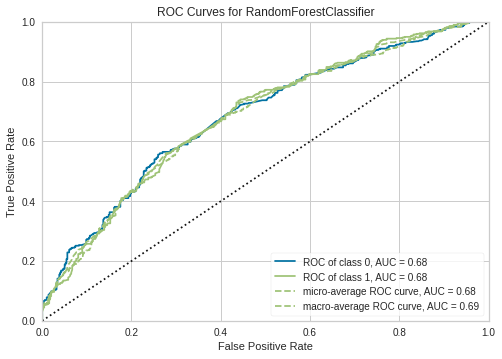

In [19]:
plot_model(tuned_rf, plot = 'auc')

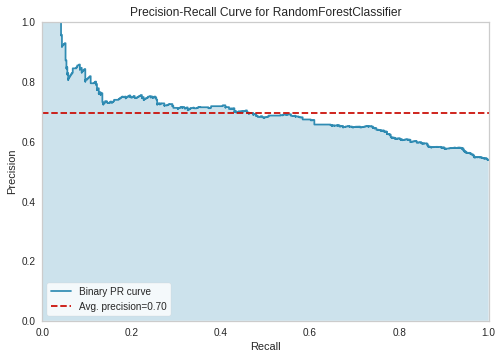

In [20]:
plot_model(tuned_rf, plot = 'pr')

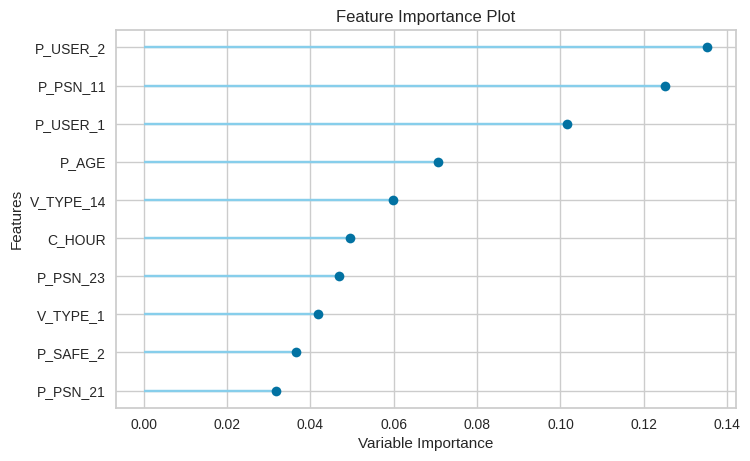

In [21]:
plot_model(tuned_rf, plot='feature')

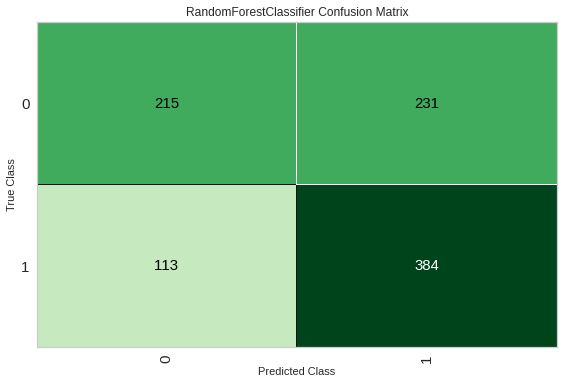

In [36]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [35]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [24]:
predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6352,0.6847,0.7726,0.6244,0.6906,0.2582,0.267


,C_HOUR,P_AGE,V_AGE,C_MNTH_1,C_MNTH_10,C_MNTH_11,C_MNTH_12,C_MNTH_2,C_MNTH_3,C_MNTH_4,C_MNTH_5,C_MNTH_6,C_MNTH_7,C_MNTH_8,C_MNTH_9,C_WDAY_1,C_WDAY_2,C_WDAY_3,C_WDAY_4,C_WDAY_5,C_WDAY_6,C_WDAY_7,C_VEHS_11,C_VEHS_16,C_VEHS_2,C_VEHS_3,C_VEHS_4,C_VEHS_5,C_VEHS_6,C_VEHS_7,C_VEHS_8,C_VEHS_9,C_RCFG_1,C_RCFG_2,C_RCFG_3,C_RCFG_5,C_RCFG_8,C_RCFG_9,C_WTHR_1,C_WTHR_2,...,C_TRAF_13,C_TRAF_17,C_TRAF_18,C_TRAF_2,C_TRAF_3,C_TRAF_4,C_TRAF_5,C_TRAF_7,C_TRAF_8,V_TYPE_1,V_TYPE_10,V_TYPE_11,V_TYPE_14,V_TYPE_21,V_TYPE_5,V_TYPE_6,V_TYPE_7,V_TYPE_8,V_TYPE_9,P_SEX_0,P_PSN_11,P_PSN_12,P_PSN_13,P_PSN_21,P_PSN_22,P_PSN_23,P_PSN_31,P_PSN_32,P_PSN_96,P_SAFE_1,P_SAFE_12,P_SAFE_13,P_SAFE_2,P_SAFE_9,P_USER_1,P_USER_2,P_USER_4,P_ISEV,Label,Score
0,21.0,51.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0.5359
1,17.0,32.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.5484
2,9.0,24.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0.5347
3,21.0,45.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.7065
4,1.0,23.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.6059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,21.0,66.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0.5308
939,19.0,23.0,15.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0.5527
940,12.0,69.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0.5556
941,19.0,40.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0.

In [25]:
final_rf = finalize_model(tuned_rf)

In [26]:
#Final Random Forest model parameters for deployment
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


In [27]:
predict_model(final_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6341,0.6999,0.7746,0.623,0.6906,0.2558,0.265


,C_HOUR,P_AGE,V_AGE,C_MNTH_1,C_MNTH_10,C_MNTH_11,C_MNTH_12,C_MNTH_2,C_MNTH_3,C_MNTH_4,C_MNTH_5,C_MNTH_6,C_MNTH_7,C_MNTH_8,C_MNTH_9,C_WDAY_1,C_WDAY_2,C_WDAY_3,C_WDAY_4,C_WDAY_5,C_WDAY_6,C_WDAY_7,C_VEHS_11,C_VEHS_16,C_VEHS_2,C_VEHS_3,C_VEHS_4,C_VEHS_5,C_VEHS_6,C_VEHS_7,C_VEHS_8,C_VEHS_9,C_RCFG_1,C_RCFG_2,C_RCFG_3,C_RCFG_5,C_RCFG_8,C_RCFG_9,C_WTHR_1,C_WTHR_2,...,C_TRAF_13,C_TRAF_17,C_TRAF_18,C_TRAF_2,C_TRAF_3,C_TRAF_4,C_TRAF_5,C_TRAF_7,C_TRAF_8,V_TYPE_1,V_TYPE_10,V_TYPE_11,V_TYPE_14,V_TYPE_21,V_TYPE_5,V_TYPE_6,V_TYPE_7,V_TYPE_8,V_TYPE_9,P_SEX_0,P_PSN_11,P_PSN_12,P_PSN_13,P_PSN_21,P_PSN_22,P_PSN_23,P_PSN_31,P_PSN_32,P_PSN_96,P_SAFE_1,P_SAFE_12,P_SAFE_13,P_SAFE_2,P_SAFE_9,P_USER_1,P_USER_2,P_USER_4,P_ISEV,Label,Score
0,21.0,51.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0.5237
1,17.0,32.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.5445
2,9.0,24.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0.5331
3,21.0,45.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.6728
4,1.0,23.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.5791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,21.0,66.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0.5242
939,19.0,23.0,15.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0.5530
940,12.0,69.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0.5507
941,19.0,40.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0.

In [28]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,V_AGE,Label,Score
0,8,5,3,2,1,1,1,1,18,1,0,20,11,1,2,1,14,1,0.5725
1,2,1,18,2,1,1,1,1,18,1,1,19,11,1,2,1,7,1,0.5489
2,6,7,19,2,2,1,1,1,1,1,1,68,13,1,2,2,2,0,0.5588
3,11,2,20,2,1,6,1,1,18,1,0,28,11,1,2,1,1,1,0.5310
4,6,5,23,2,1,1,1,1,18,1,0,6,21,1,2,2,3,0,0.6099


In [29]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['P_ISEV'], unseen_predictions['Label'], metric = 'Accuracy')

0.6606

In [34]:
from datetime import datetime
now = datetime.now().strftime("%d-%b-%y-%H-%M-%S") # current date and time
save_model(final_rf,'Final RF Model '+ now)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='P_ISEV',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=6,
                                         max_features